In [33]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop


In [34]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
len(X_train), len(y_train)

(60000, 60000)

In [36]:
num_labels = len(np.unique(y_train))
unique, counts = np.unique(y_train, return_counts=True)
print('Train Labels:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('\nTest Labels:', dict(zip(unique, counts)))

Train Labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test Labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


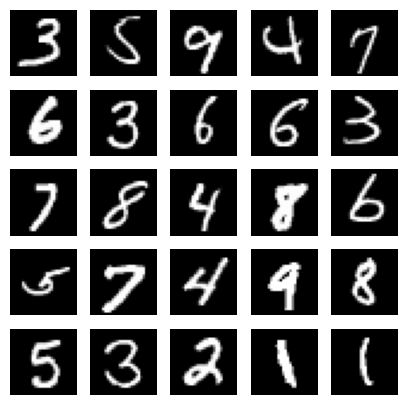

In [37]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range (len(indexes)):
    plt.subplot(5,5, i+1)
    image = images[i]
    plt.imshow(image, cmap= 'gray')
    plt.axis('off')

plt.show()
plt.savefig('mnist_fig.png')
plt.close('all')

In [38]:
from keras.utils import to_categorical, plot_model

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
image_size = X_train.shape[1]
input_size = image_size * image_size
print(input_size)

784


In [48]:
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32')/255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32')/255

In [49]:
batch_size = 128
hidden_units = 256
dropout = 0.45


model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 activation_14 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)               

In [51]:
!pip install pydot

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install graphviz

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
plot_model(model, to_file='mlp_mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs = 20, batch_size=batch_size)

Epoch 1/20


469/469 [==============================] - 21s 30ms/step - loss: 0.4273 - accuracy: 0.8695
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1945 - accuracy: 0.9416
Epoch 3/20
469/469 [==============================] - 11s 22ms/step - loss: 0.1540 - accuracy: 0.9533
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1327 - accuracy: 0.9601
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1138 - accuracy: 0.9644
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1025 - accuracy: 0.9690
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0942 - accuracy: 0.9709
Epoch 8/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0885 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0812 - accuracy: 0.9739
Epoch 10/20
469/469 [==============================] - 8s 18ms/step - loss: 0.07

In [56]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print ('\n Test Accuracy: %.1f%%'% (100 * acc))


79/79 [==============================] - 2s 11ms/step - loss: 0.0665 - accuracy: 0.9812

 Test Accuracy: 98.1%
